In [1]:
# coding:utf8
import numpy as np
import cv2
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import math

In [2]:
# otsu算法
def otsu(img):
    img_vector = img.flatten()
    pixel_counter = np.zeros(256)
    for pixel_value in img_vector:
        pixel_counter[pixel_value] += 1


    min_variance = np.inf
    best_threshold = 0
    pixel_value = np.arange(256)
    for threshold in range(256):

        pixel_value_A = pixel_value[0:threshold]
        pixel_value_B = pixel_value[threshold:]
        
        totalPixelNum_A = np.sum(pixel_counter[pixel_value_A]) 
        totalPixelNum_B = np.sum(pixel_counter[pixel_value_B])

        Probability_pixelvalue_A = pixel_counter[pixel_value_A]/totalPixelNum_A
        Probability_pixelvalue_B = pixel_counter[pixel_value_B]/totalPixelNum_B

        meanPixelValue_A = np.sum(pixel_value_A  *  Probability_pixelvalue_A)
        meanPixelValue_B = np.sum(pixel_value_B  *  Probability_pixelvalue_B)

        varianceA = np.sum(Probability_pixelvalue_A * (pixel_value_A-meanPixelValue_A)**2)
        varianceB = np.sum(Probability_pixelvalue_B * (pixel_value_B-meanPixelValue_B)**2)

        current_total_variance = totalPixelNum_A*varianceA + totalPixelNum_B*varianceB
        if current_total_variance<min_variance:
            min_variance = current_total_variance
            best_threshold = threshold


    print(best_threshold)
    ret, binary = cv2.threshold(img, best_threshold, 255, cv2.THRESH_BINARY)
    return binary



# rcotsu算法，min为最小灰度参数，max为最大灰度参数
def rc_otsu(img,min,max):
    temp=max-min+1
    img_vector = img.flatten()
    pixel_counter = np.zeros(256)
    for pixel_value in img_vector:
        if(pixel_value>=min):
            if(pixel_value<=max):
                pixel_counter[pixel_value] += 1


    min_variance = np.inf
    best_threshold = 0
    pixel_value = np.arange(temp)
    for threshold in range(temp):

        pixel_value_A = pixel_value[min:threshold]
        pixel_value_B = pixel_value[threshold:max]
        
        totalPixelNum_A = np.sum(pixel_counter[pixel_value_A]) 
        totalPixelNum_B = np.sum(pixel_counter[pixel_value_B])

        Probability_pixelvalue_A = pixel_counter[pixel_value_A]/totalPixelNum_A
        Probability_pixelvalue_B = pixel_counter[pixel_value_B]/totalPixelNum_B

        meanPixelValue_A = np.sum(pixel_value_A  *  Probability_pixelvalue_A)
        meanPixelValue_B = np.sum(pixel_value_B  *  Probability_pixelvalue_B)

        varianceA = np.sum(Probability_pixelvalue_A * (pixel_value_A-meanPixelValue_A)**2)
        varianceB = np.sum(Probability_pixelvalue_B * (pixel_value_B-meanPixelValue_B)**2)

        current_total_variance = totalPixelNum_A*varianceA + totalPixelNum_B*varianceB
        if current_total_variance<min_variance:
            min_variance = current_total_variance
            best_threshold = threshold


    print(best_threshold)
    ret, binary = cv2.threshold(img, best_threshold, 255, cv2.THRESH_BINARY)
    return binary

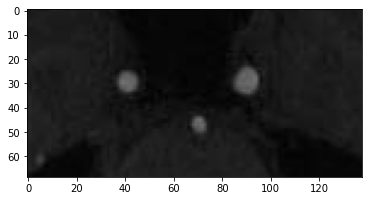

In [3]:
mra=cv2.imread(r'E:\fbk\DIP\MRA.pgm',0)
mra = cv2.cvtColor(mra, cv2.COLOR_BGR2RGB)
plt.imshow(mra)
# plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

In [4]:
# binary1=mra.copy()
# image_ravel=binary1.ravel()
# get_ipython().run_line_magic('matplotlib', 'auto')
# plt.hist(image_ravel,256,[0,256])
# plt.show()



In [5]:
binary = cv2.cvtColor(mra, cv2.COLOR_BGR2GRAY)
binaryrc=binary.copy()

otsu_mra=otsu(binary)

21


C:\Users\fbk\AppData\Local\Temp/ipykernel_4084/3556611983.py:20: RuntimeWarning: invalid value encountered in true_divide
  Probability_pixelvalue_A = pixel_counter[pixel_value_A]/totalPixelNum_A
C:\Users\fbk\AppData\Local\Temp/ipykernel_4084/3556611983.py:21: RuntimeWarning: invalid value encountered in true_divide
  Probability_pixelvalue_B = pixel_counter[pixel_value_B]/totalPixelNum_B


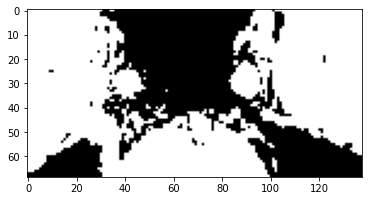

In [6]:
otsu_mra = cv2.cvtColor(otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(otsu_mra)

58


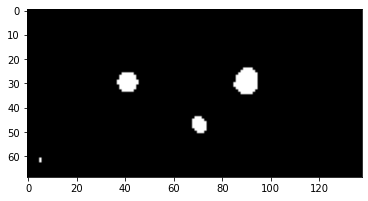

In [14]:

rc_otsu_mra=rc_otsu(binaryrc,10,120)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

58


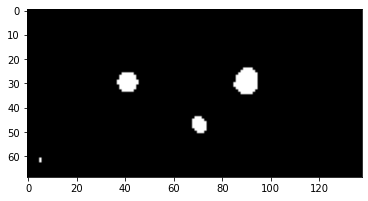

In [15]:
rc_otsu_mra=rc_otsu(binaryrc,15,120)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

56


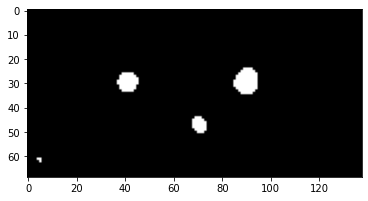

In [16]:
rc_otsu_mra=rc_otsu(binaryrc,20,120)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

53


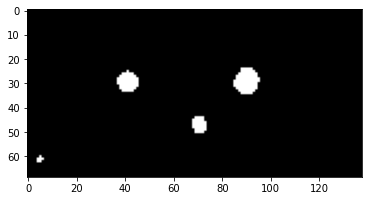

In [17]:
rc_otsu_mra=rc_otsu(binaryrc,25,120)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

53


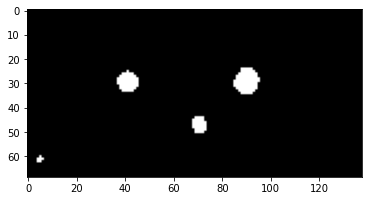

In [18]:
rc_otsu_mra=rc_otsu(binaryrc,30,120)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

54


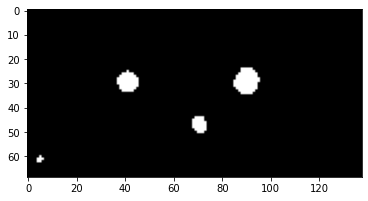

In [19]:
rc_otsu_mra=rc_otsu(binaryrc,35,120)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

59


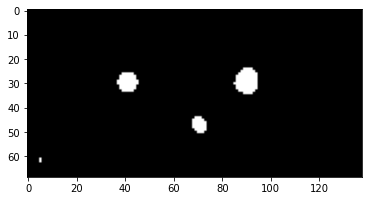

In [20]:
rc_otsu_mra=rc_otsu(binaryrc,40,120)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

57


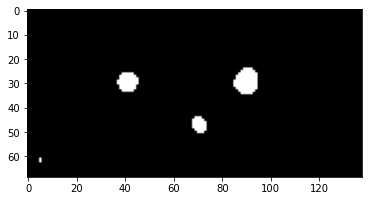

In [21]:
rc_otsu_mra=rc_otsu(binaryrc,10,115)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

54


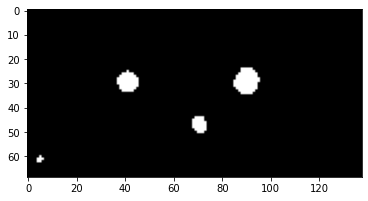

In [22]:
rc_otsu_mra=rc_otsu(binaryrc,10,110)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

50


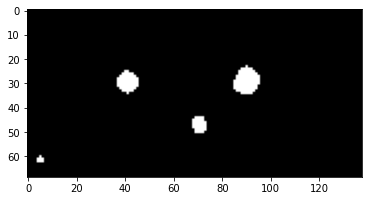

In [23]:
rc_otsu_mra=rc_otsu(binaryrc,10,105)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

25


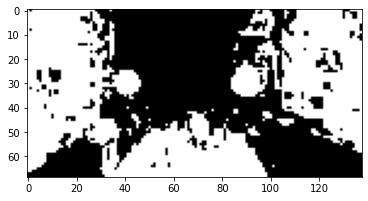

In [24]:
rc_otsu_mra=rc_otsu(binaryrc,10,100)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)

47


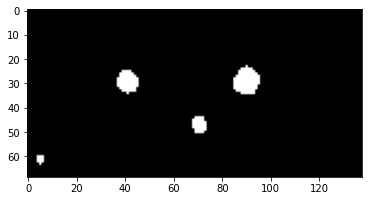

In [25]:
rc_otsu_mra=rc_otsu(binaryrc,30,110)
rc_otsu_mra = cv2.cvtColor(rc_otsu_mra, cv2.COLOR_BGR2RGB)
plt.imshow(rc_otsu_mra)